In [0]:
import pandas as pd
import operator as op
import xml.etree.ElementTree as et
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
sns.set(rc={'figure.figsize':(12.7,8.27)})
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

In [0]:
def parse_XML(xml_file, df_cols): 
    """Parse the input XML file and store the result in a pandas 
    DataFrame with the given columns. 
    
    The first element of df_cols is supposed to be the identifier 
    variable, which is an attribute of each node element in the 
    XML data; other features will be parsed from the text content 
    of each sub-element. 
    """
    
    xtree = et.parse(xml_file)
    xroot = xtree.getroot()
    rows = []
    
    for node in xroot: 
        res = []
        res.append(node.attrib.get(df_cols[0]))
        for el in df_cols[1:]: 
            if node is not None and node.find(el) is not None:
                res.append(node.find(el).text)
            else: 
                res.append(None)
        rows.append({df_cols[i]: res[i] 
                     for i, _ in enumerate(df_cols)})
    
    out_df = pd.DataFrame(rows, columns=df_cols)
        
    return out_df

In [0]:
onion_producing_states=["Maharashtra", "Madhya Pradesh", "Karnataka", "Gujarat", "Rajasthan", "Andhra Pradesh", "Haryana", "West Bengal", "Uttar Pradesh", "Chattisgarh", "Jharkhand","Telangana"]
onion_maturity_days=np.arange(100,176)
onion_non_harv_months=['06','07','08']
drought_sates=[["Maharashtra","Karnataka","Andhra Pradesh","Uttar Pradesh"],["Kerala","Rajasthan","Madhya Pradesh","Karnataka","Uttrakhand","Uttar Pradesh","Andhra Pradesh"]]

In [0]:
onion_xml=['id','State','District','Market','Commodity','Variety','Arrival_Date','Min_x0020_Price','Max_x0020_Price','Modal_x0020_Price']
data2=parse_XML('/content/drive/My Drive/Untitled Folder/Onion_2017.xml',onion_xml)
data=pd.read_csv('/content/drive/My Drive/Untitled Folder/Onion_2019.csv')
data2=data2.drop('id',axis=1)

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data.columns=data2.columns

In [0]:
coldata=[data,data2]
for datas in coldata:
    datas['Month']=datas['Arrival_Date'].str.split('/',expand=True)[1]
rows,cols=(2,12)
sc=[[0]*cols]*rows
sd=[0]*4
se=[0]*7

i=0
    
le=LabelEncoder()
x=le.fit_transform(data['State'])
sd=le.transform(drought_sates[0])
y=le.fit_transform(data2['State'])
se=le.transform(drought_sates[1])

In [0]:
for datas in coldata:
    datas['State_code']=le.fit_transform(datas['State'])
    sc[i]=le.transform(onion_producing_states)
    i=1
    datas['Price']=datas['Modal_x0020_Price'].apply(pd.to_numeric).div(100)

In [0]:
sc=np.vstack(sc)

In [17]:
sc

array([[14, 13, 11,  6, 22,  1,  7, 27, 25,  4, 10, 23],
       [15, 14, 12,  7, 22,  1,  8, 27, 25,  5, 11, 23]])

In [18]:
for datas in coldata:
    datas['Producing']=0
    datas['Harvesting Month']=1
    datas['Drought Happen']=0
data.head(10)

,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,Month,State_code,Price,Producing,Harvesting Month,Drought Happen
0,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,07/06/2019,6000,10000,8000.0,06,0,80.0,0,1,0
1,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,11/06/2019,6000,10000,8000.0,06,0,80.0,0,1,0
2,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,12/06/2019,6000,10000,8000.0,06,0,80.0,0,1,0
3,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,13/06/2019,6000,10000,8000.0,06,0,80.0,0,1,0
4,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,14/06/2019,4000,8000,6000.0,06,0,60.0,0,1,0
5,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,15/06/2019,6000,10000,8000.0,06,0,80.0,0,1,0
6,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,17/06/2019,4000,8000,6000.0,06,0,60.0,0,1,0
7,Andaman and Nicobar,North and Middle Andaman,Diglipur,Onion,Other,02/03/2019,3000,4000,3500.0,03,0,35.0,0,1,0
8,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,04/03/2019,2000,3500,3000.0,03,0,30.0,0,1,0
9,Andaman and Nicobar,South Andaman,Port Blair,Onion,Other,07/03/2019,2500,3500,3000.0,03,0,30.0,0,1,0


In [0]:
x=data.values

for i in range(len(x)):
    for j in np.arange(0,12):
        if x[i,10]==sc[0,j]:
            x[i,12]=1
for i in range(len(x)):
    for j in range(len(onion_non_harv_months)):
        if x[i,9]==onion_non_harv_months[j]:
            x[i,13]=0
for i in range(len(x)):
    for j in range(len(sd)):
        if (x[i,10]==sd[j]):
            x[i,14]=1
            
dataset=pd.DataFrame(x,columns=data.columns)

In [0]:
x=data2.values

for i in range(len(x)):
    for j in range(12):
        if x[i,10]==sc[1,j]:
            x[i,12]=1
for i in range(len(x)):
    for j in range(len(onion_non_harv_months)):
        if x[i,9]==onion_non_harv_months[j]:
            x[i,13]=0
for i in range(len(x)):
    for j in range(len(se)):
        if (x[i,10]==se[j]):
            x[i,14]=1

datasets=pd.DataFrame(x,columns=data.columns)

In [21]:
dataset.head(100)

,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,Month,State_code,Price,Producing,Harvesting Month,Drought Happen
0,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,07/06/2019,6000,10000,8000,06,0,80,0,0,0
1,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,11/06/2019,6000,10000,8000,06,0,80,0,0,0
2,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,12/06/2019,6000,10000,8000,06,0,80,0,0,0
3,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,13/06/2019,6000,10000,8000,06,0,80,0,0,0
4,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,14/06/2019,4000,8000,6000,06,0,60,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,08/05/2019,620,1050,840,05,1,8.4,1,1,1
96,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,09/05/2019,930,940,940,05,1,9.4,1,1,1
97,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,10/05/2019,590,870,620,05,1,6.2,1,1,1
98,Andhra Pradesh,Kurnool,Kurnool,Onion,Local,11/05/2019,460,700,670,05,1,6.7,1,1,1


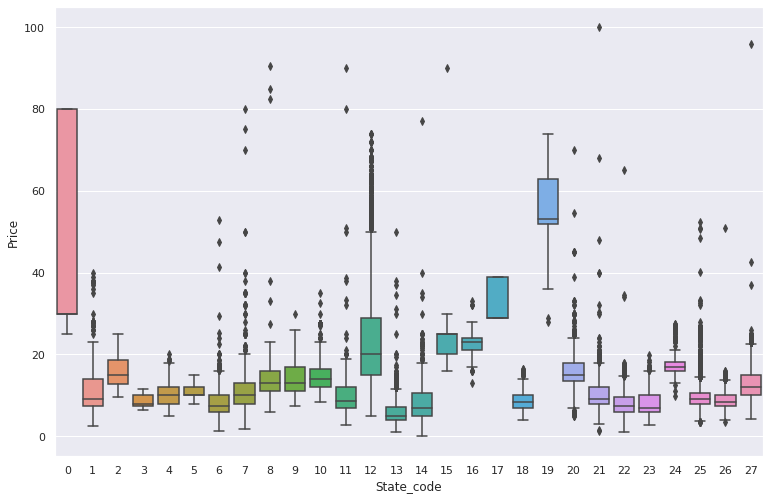

In [22]:
sns.boxplot(x='State_code',y='Price',data=data)

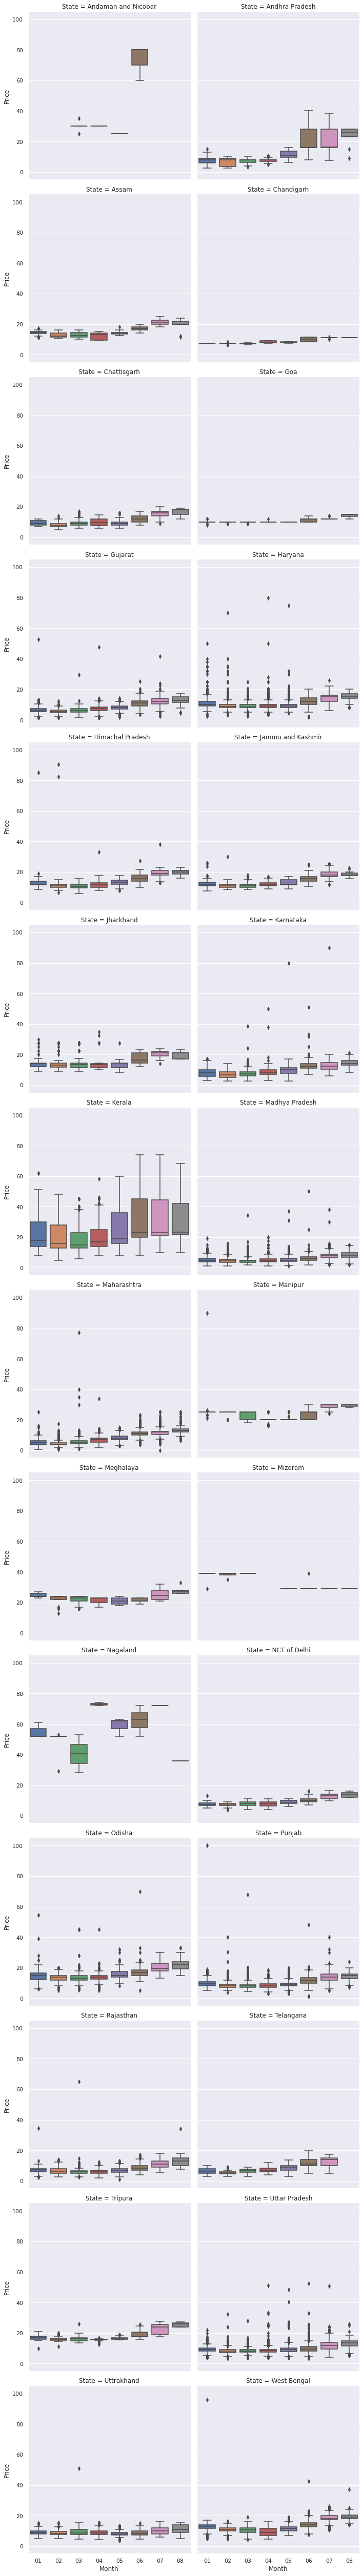

In [23]:
sns.catplot(x='Month',y='Price',col='State',col_wrap=2,data=dataset,kind='box')


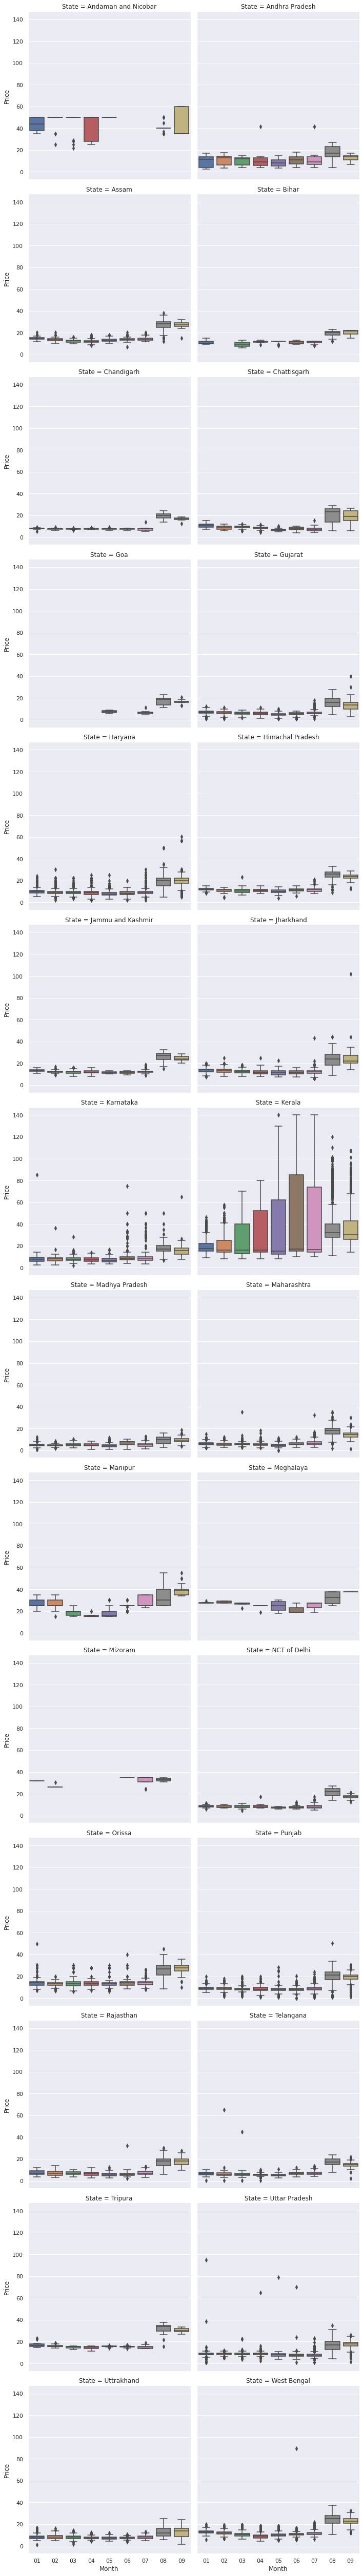

In [24]:
sns.catplot(x='Month',y='Price',col='State',col_wrap=2,data=datasets,kind='box')

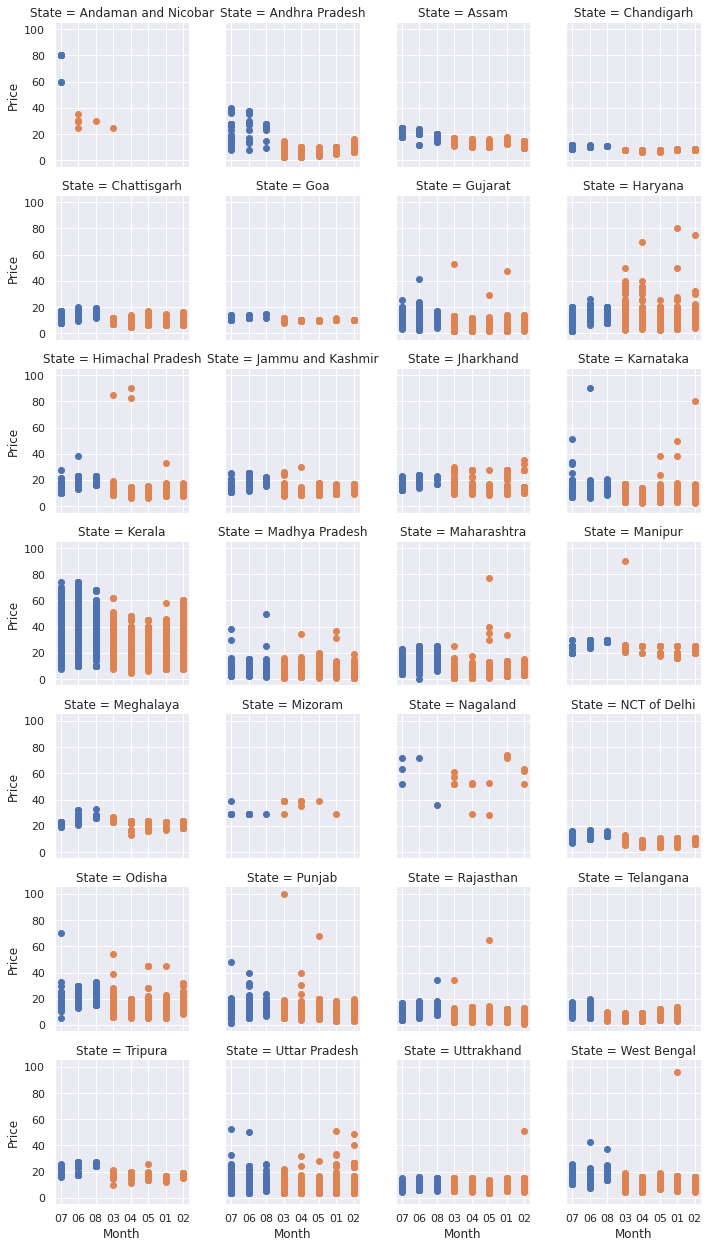

In [25]:
g = sns.FacetGrid(dataset,  col="State",hue="Harvesting Month" ,col_wrap=4, height=2.5)
g.map(plt.scatter,"Month","Price")


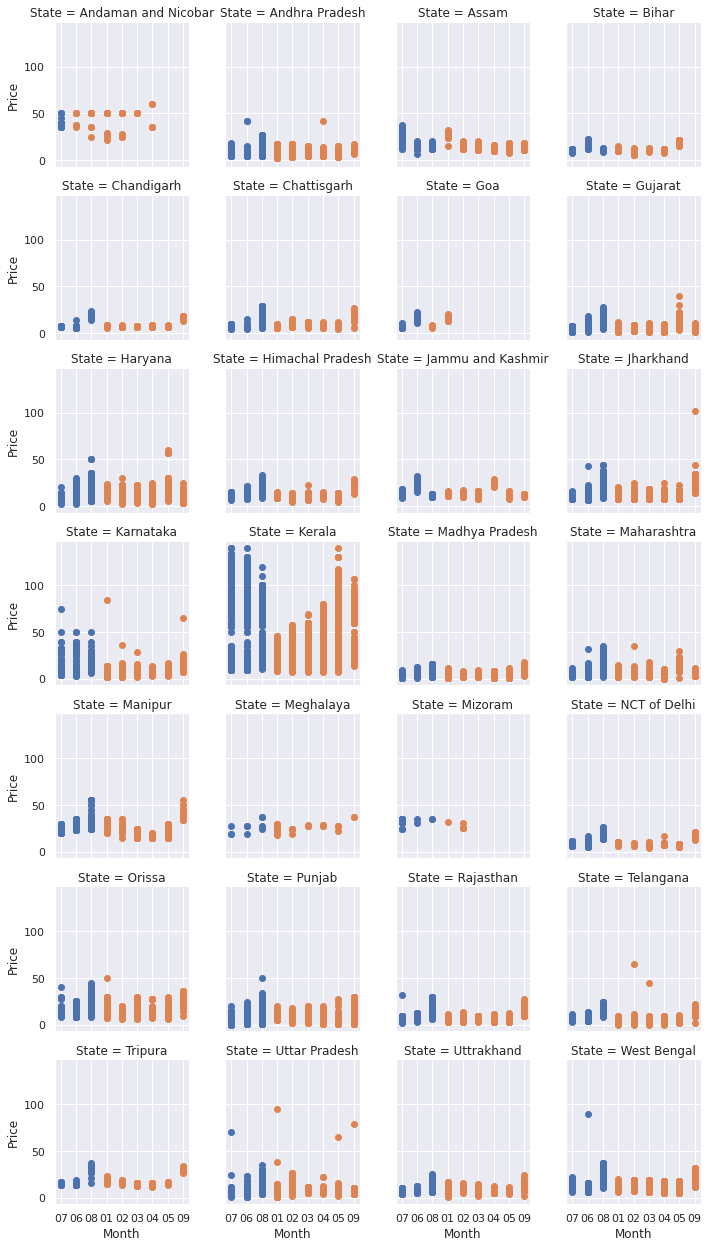

In [26]:
g = sns.FacetGrid(datasets,  col="State",hue="Harvesting Month", col_wrap=4, height=2.5)
g.map(plt.scatter,"Month","Price")

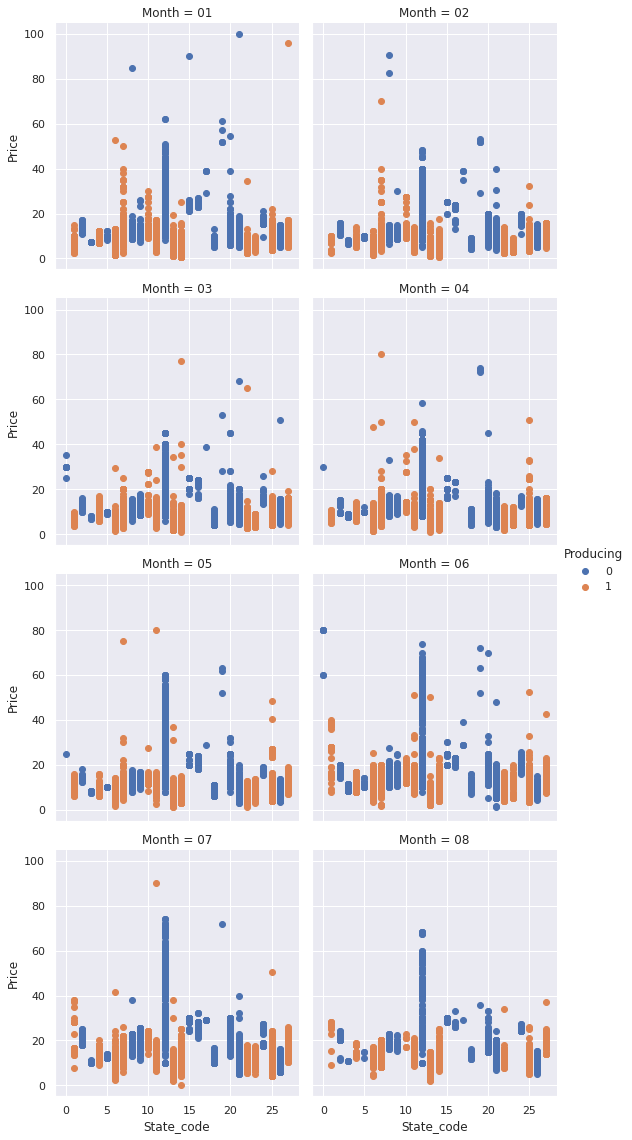

In [27]:

g = sns.FacetGrid(dataset,  col="Month",hue="Producing", col_wrap=2, height=4)
g.map(plt.scatter,"State_code","Price")
g.add_legend()

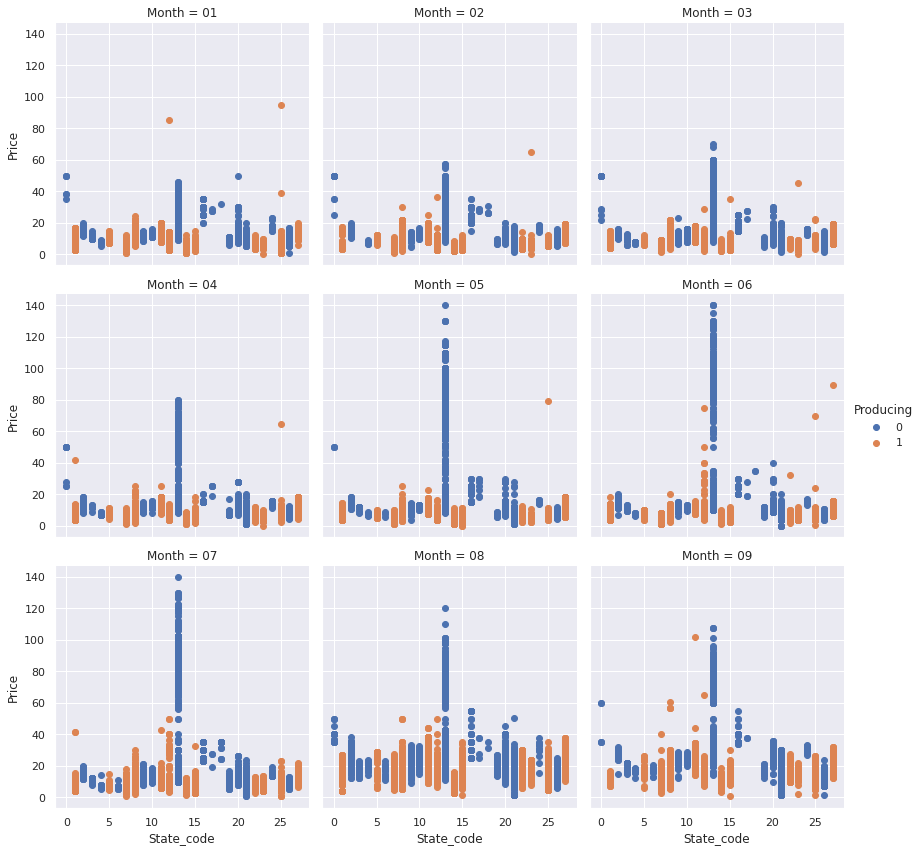

In [28]:
g = sns.FacetGrid(datasets,  col="Month",hue="Producing", col_wrap=3, height=4)
g.map(plt.scatter,"State_code","Price")
g.add_legend()

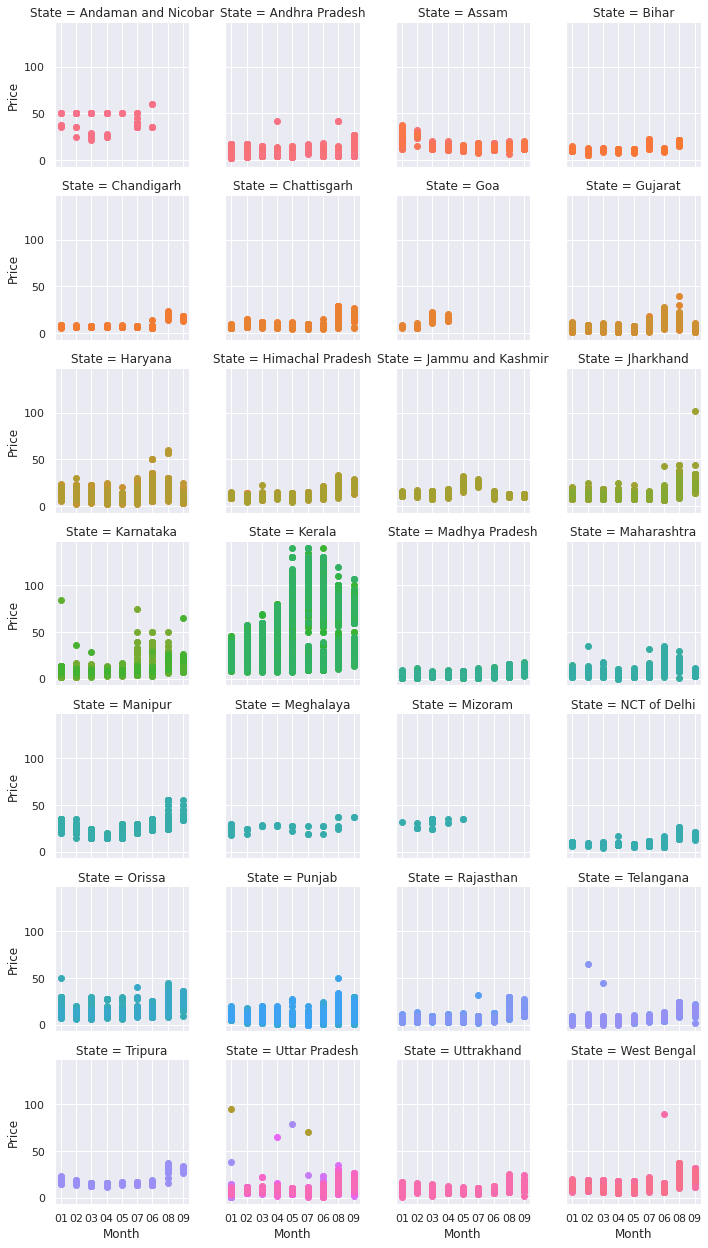

In [29]:
g = sns.FacetGrid(datasets,  col="State",hue="District", col_wrap=4, height=2.5)
g.map(plt.scatter,"Month","Price")


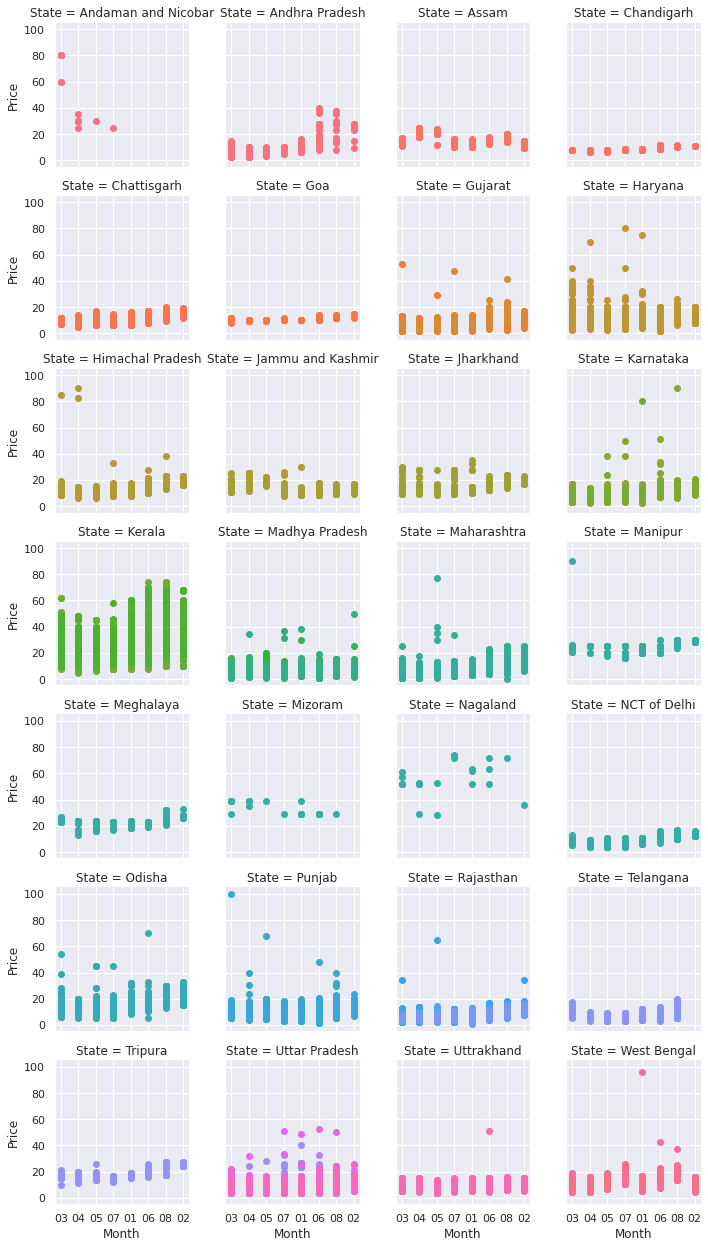

In [30]:
g = sns.FacetGrid(dataset,  col="State",hue="District", col_wrap=4, height=2.5)
g.map(plt.scatter,"Month","Price")


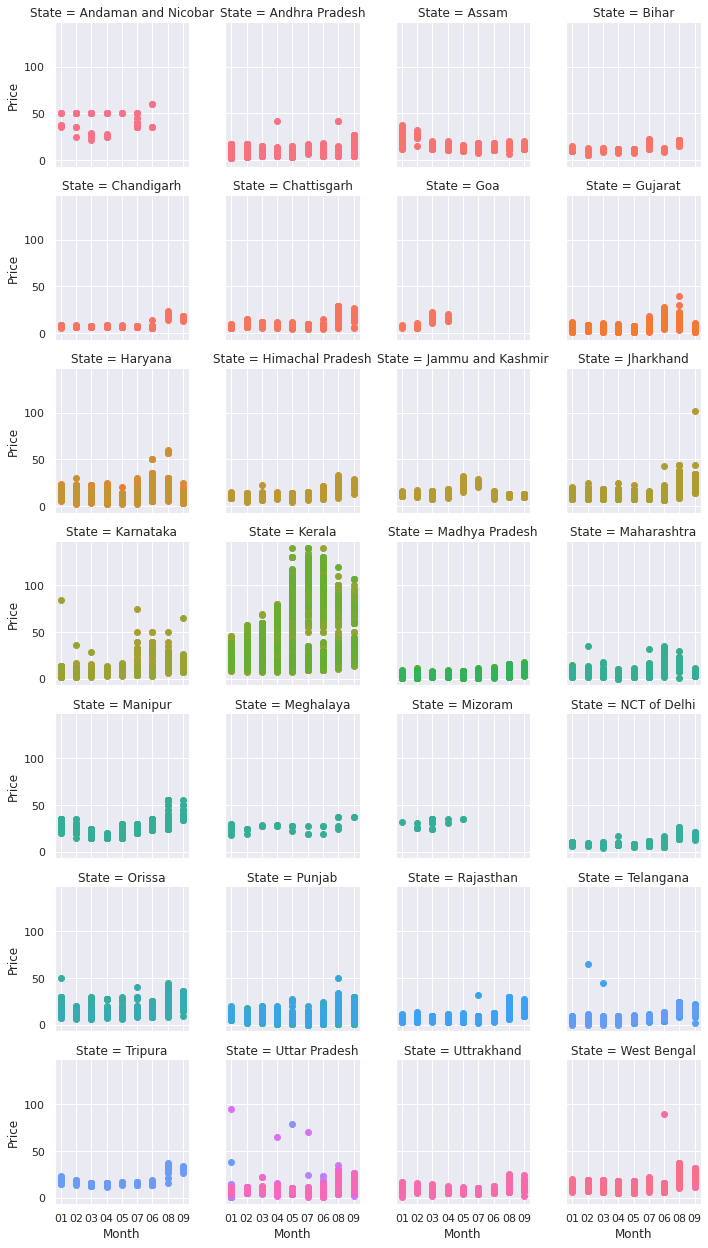

In [31]:
g = sns.FacetGrid(datasets,  col="State",hue="Market", col_wrap=4, height=2.5)
g.map(plt.scatter,"Month","Price")


In [32]:
s=dataset["Variety"].values
s=np.unique(s)
names = list(mcolors.CSS4_COLORS)
pal={}
for x in range(len(s)):
    new_key=s[x]
    new_val=names[x]
    pal[new_key]=new_val
pal

{'1st Sort': 'aliceblue',
 '2nd Sort': 'antiquewhite',
 'Bangalore-Samall': 'aqua',
 'Beelary-Red': 'aquamarine',
 'Bellary': 'azure',
 'Big': 'beige',
 'Bombay (U.P.)': 'bisque',
 'Dry F.A.Q.': 'black',
 'Hybrid': 'blanchedalmond',
 'Local': 'blue',
 'Medium': 'blueviolet',
 'Nasik': 'brown',
 'Onion': 'burlywood',
 'Other': 'cadetblue',
 'Pole': 'chartreuse',
 'Puna': 'chocolate',
 'Pusa-Red': 'coral',
 'Red': 'cornflowerblue',
 'Small': 'cornsilk',
 'Telagi': 'crimson',
 'White': 'cyan'}

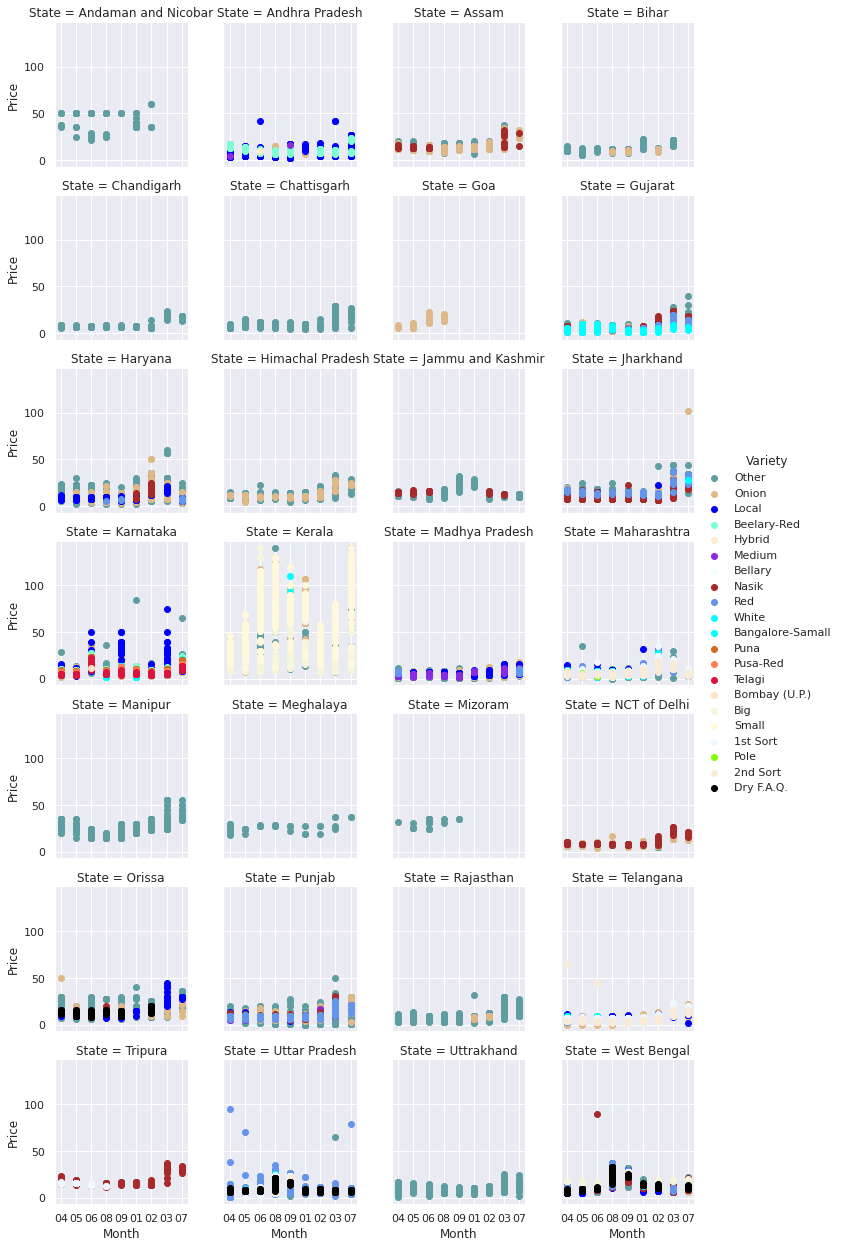

In [33]:
g = sns.FacetGrid(datasets,  col="State",hue="Variety",palette=pal, col_wrap=4, height=2.5)
g.map(plt.scatter,"Month","Price")
g.add_legend()

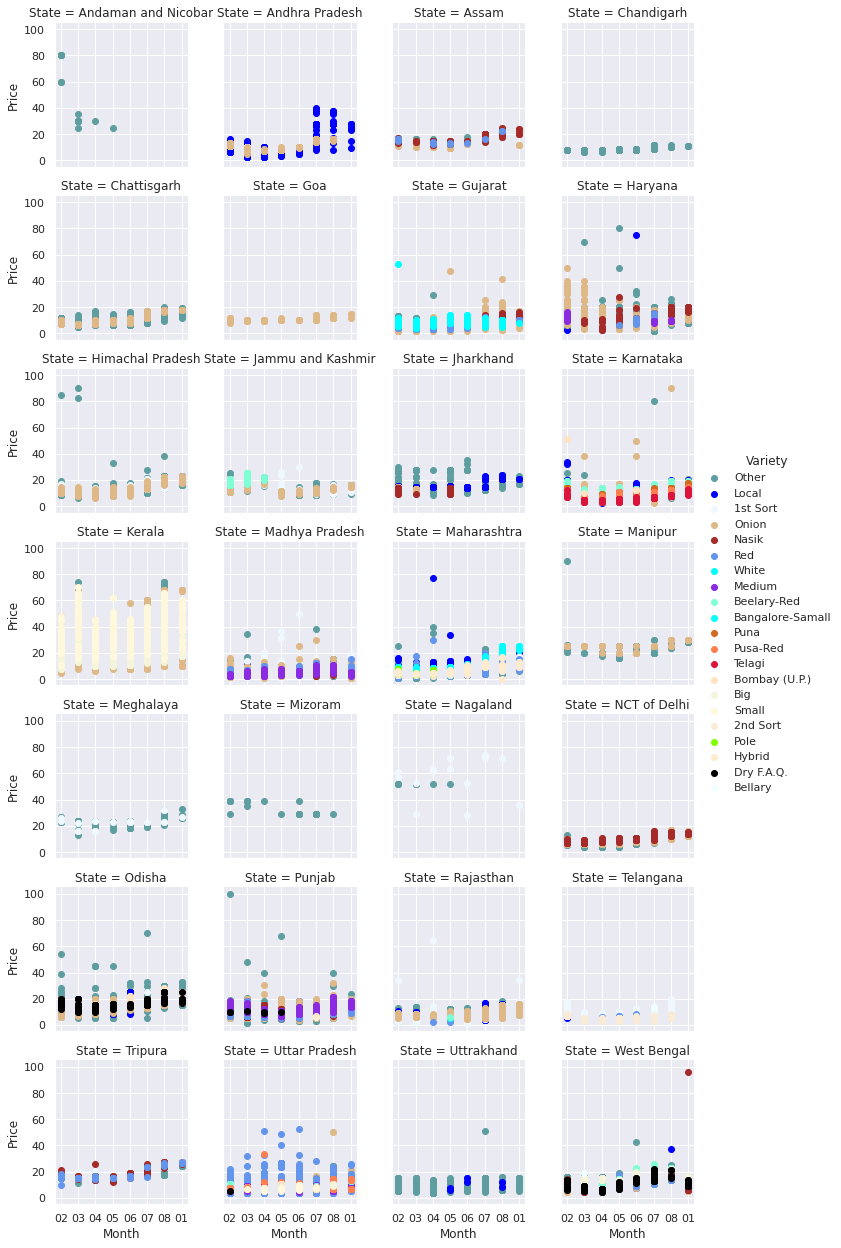

In [34]:
g = sns.FacetGrid(dataset,  col="State",hue="Variety",palette=pal, col_wrap=4, height=2.5)
g.map(plt.scatter,"Month","Price")
g.add_legend()

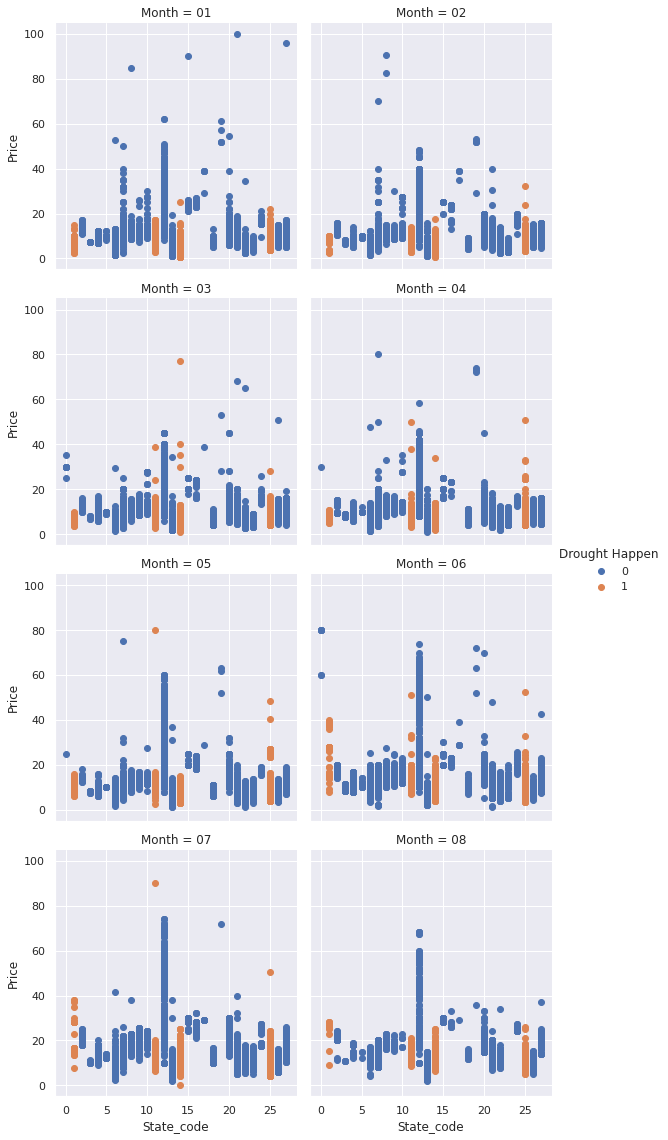

In [35]:

g = sns.FacetGrid(dataset,  col="Month",hue="Drought Happen", col_wrap=2, height=4)
g.map(plt.scatter,"State_code","Price")
g.add_legend()

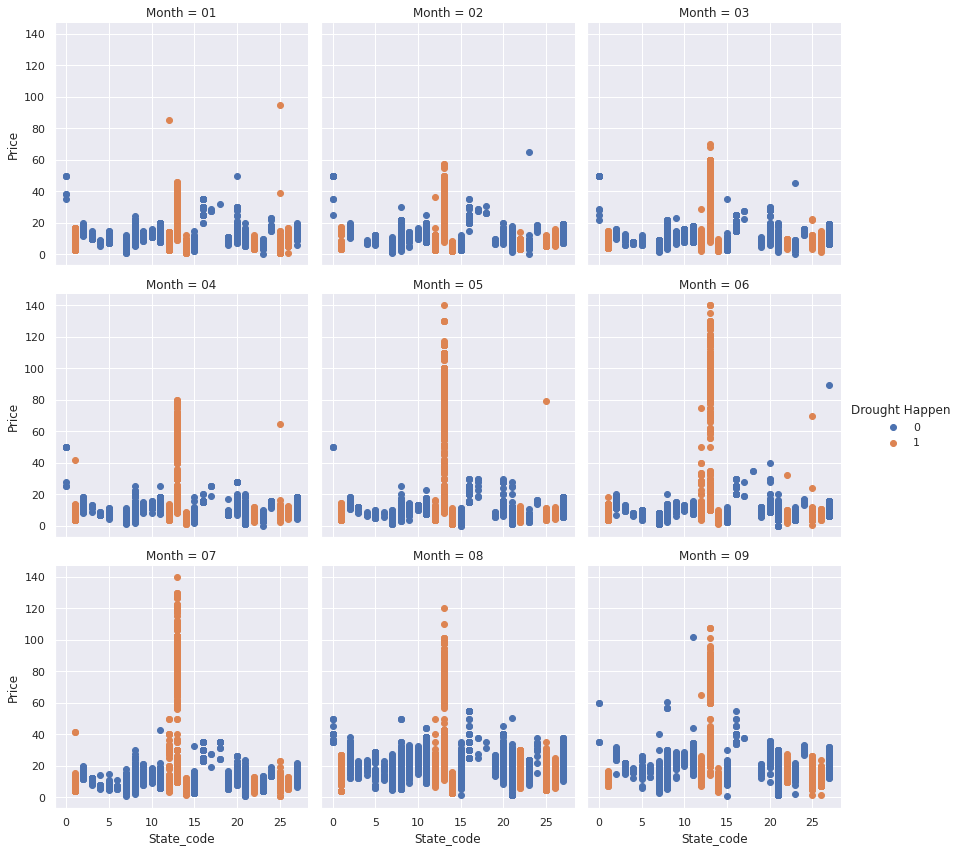

In [36]:
g = sns.FacetGrid(datasets,  col="Month",hue="Drought Happen", col_wrap=3, height=4)
g.map(plt.scatter,"State_code","Price")
g.add_legend()

In [37]:
dataset.head()


,State,District,Market,Commodity,Variety,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price,Month,State_code,Price,Producing,Harvesting Month,Drought Happen
0,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,07/06/2019,6000,10000,8000,06,0,80,0,0,0
1,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,11/06/2019,6000,10000,8000,06,0,80,0,0,0
2,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,12/06/2019,6000,10000,8000,06,0,80,0,0,0
3,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,13/06/2019,6000,10000,8000,06,0,80,0,0,0
4,Andaman and Nicobar,Nicobar,Car Nicobar,Onion,Other,14/06/2019,4000,8000,6000,06,0,60,0,0,0


In [0]:
X=dataset.values[:,[1,2,4,9,10,12,13,14]]
Y=dataset.values[:,11]

In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[: ,0]= labelencoder_X.fit_transform(X[: ,0])
X[: ,1]= labelencoder_X.fit_transform(X[: ,1])
X[: ,2]= labelencoder_X.fit_transform(X[: ,2])
onehotencoder= OneHotEncoder(categories='auto')
X= onehotencoder.fit_transform(X).toarray()
X=np.delete(X,[0,28,368,1288],1)


In [40]:
X

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=0)


 **Linear Regression** 

In [42]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)
y_pred= regressor.predict(X_test)
regressor.score(X_test,Y_test)

-338762086784551.44

In [43]:
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten(),'Error':y_pred-Y_test})
df

,Actual,Predicted,Error
0,10.5,10.830078,0.330078
1,8,10.380859,2.38086
2,12,13.873047,1.87305
3,5.5,6.832031,1.33203
4,8,11.501953,3.50195
...,...,...,...
23097,9.2,12.708984,3.50898
23098,12.5,14.015625,1.51562
23099,11.7,12.501953,0.801953
23100,4,9.923828,5.92383


**Lasso Linear Model**

In [0]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train,Y_train)
y_pred= reg.predict(X_test)

In [45]:
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten(),'Error':y_pred-Y_test})
df

,Actual,Predicted,Error
0,10.5,13.169748,2.66975
1,8,9.943596,1.9436
2,12,19.784815,7.78482
3,5.5,8.374739,2.87474
4,8,10.444387,2.44439
...,...,...,...
23097,9.2,12.445141,3.24514
23098,12.5,13.126894,0.626894
23099,11.7,11.678899,-0.0211005
23100,4,10.444387,6.44439


**SVR**

In [0]:
from sklearn import svm
regr = svm.SVR()
reg.fit(X_train,Y_train)
y_pred= reg.predict(X_test)

In [47]:
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten(),'Error':y_pred-Y_test})
df

,Actual,Predicted,Error
0,10.5,13.169748,2.66975
1,8,9.943596,1.9436
2,12,19.784815,7.78482
3,5.5,8.374739,2.87474
4,8,10.444387,2.44439
...,...,...,...
23097,9.2,12.445141,3.24514
23098,12.5,13.126894,0.626894
23099,11.7,11.678899,-0.0211005
23100,4,10.444387,6.44439


**MLP Regression**

In [54]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, Y_train)
y_pred= regr.predict(X_test)
regr.score(X_test, Y_test)

0.9271665800675106

In [55]:
df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': y_pred.flatten(),'Error':y_pred-Y_test})
df

,Actual,Predicted,Error
0,10.5,10.944905,0.444905
1,8,9.815607,1.81561
2,12,12.228020,0.22802
3,5.5,5.599412,0.0994123
4,8,8.108298,0.108298
...,...,...,...
23097,9.2,9.313127,0.113127
23098,12.5,12.991444,0.491444
23099,11.7,11.754804,0.0548036
23100,4,5.323790,1.32379


In [56]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('Coefficients: \n', regressor.coef_)

Mean Absolute Error: 0.9572473050402311
Mean Squared Error: 3.2466431547307364
Root Mean Squared Error: 1.8018443758356981
Coefficients: 
 [ 1.90385486e+08 -2.27074445e+10  2.72658611e+11 ...  8.95019129e+11
 -1.87429457e+12  1.96406728e+12]
